In [0]:
import urllib.request
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import sys

In [2]:
data_url = """http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz"""
fn = data_url.split("/")[-1]

import urllib.request
urllib.request.urlretrieve(data_url, fn)
!tar zxf review_polarity.tar.gz
!ls

poldata.README.2.0  review_polarity.tar.gz  sample_data  txt_sentoken


In [3]:
!head -n15 poldata.README.2.0



Introduction

This README v2.0 (June, 2004) for the v2.0 polarity dataset comes from
the URL http://www.cs.cornell.edu/people/pabo/movie-review-data .


What's New -- June, 2004

This dataset represents an enhancement of the review corpus v1.0
described in README v1.1: it contains more reviews, and labels were
created with an improved rating-extraction system.


In [4]:
import os
filenames = list()
for root, dirs, files in os.walk("./txt_sentoken"):
   for name in files:
      filenames.append(os.path.join(root, name))
print("Found %i files" % len(filenames))

Found 2000 files


In [5]:
X_txt = list()
y = list()
import random
#random.shuffle(filenames)
for i, fn in enumerate(filenames):
  if fn.find("\\pos\\") > 0:
    msg = "positive"
    y.append(1)
  else:
    msg = "negative"
    y.append(-1)
  with open(fn) as f:
    X_txt.append(f.read())
  if i < 10:
    print(fn, msg, "example")

y = np.asarray(y)
assert len(X_txt) == y.shape[0]

vectorizer = CountVectorizer()
vectorizer.fit(X_txt)
X = vectorizer.transform(X_txt)
X[X>1] = 1
words = vectorizer.get_feature_names()
newset=set()

for i,d in enumerate(X_txt):
  line=X_txt[i]
  A=set(line.split())
  newset=set(newset.union(A))

newlist=list(newset)
len(newlist)
diff=[]
for word in newlist:
  if word not in words:
    diff.append(word)
len(diff)

lut = dict()
for i, word in enumerate(newlist):
  lut[word] = i

X = np.zeros((len(X_txt), len(newlist)))
for i, doc in enumerate(X_txt):
  for word in doc.split():
    X[i, lut[word]] = 1

./txt_sentoken/neg/cv008_29326.txt negative example
./txt_sentoken/neg/cv593_11931.txt negative example
./txt_sentoken/neg/cv961_5578.txt negative example
./txt_sentoken/neg/cv059_28723.txt negative example
./txt_sentoken/neg/cv684_12727.txt negative example
./txt_sentoken/neg/cv448_16409.txt negative example
./txt_sentoken/neg/cv656_25395.txt negative example
./txt_sentoken/neg/cv918_27080.txt negative example
./txt_sentoken/neg/cv395_11761.txt negative example
./txt_sentoken/neg/cv081_18241.txt negative example


In [0]:
import sys
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

# log loss function
#input y_true 0-1，prob - positive probability
def loss_log(ytrue,prob):
    ytrue = ytrue.flatten()
    prob = prob.flatten()
    res = ytrue*np.log(prob)+(1-ytrue)*np.log(1-prob)
    res[np.isnan(res)]=0
    return np.sum(-res)

# log loss function
#input y_true 0-1，prob - positive probability
def loss_hinge(ytrue,prob):
    ytrue = ytrue.flatten()
    prob = prob.flatten()
    ypred = prob>0.5
    ytrue = ytrue*2-1
    ypred = ypred*2-1
    ytrue = ytrue.flatten()
    ypred = ypred.flatten()
    loss = np.sum(1-ytrue*ypred)
    return loss

# train the Logitic  regression model using SGD
#input siga -w parameter,lr-learning rate, alpha - L2 normalization coefficent,train_x,train_label, num - batch size of BGD,numm = 1, SGD
def train_logistic_sgd(sita,lr,alpha,train_x,train_label,num = 1):
    iter = 5     # To save time, ITER is set to 5. For better training, its value can be set to 10000
    losslog = []
    losshinge = []
    for i in range(iter):
        nums = train_x.shape[0]

        rnd = np.arange(nums)
        np.random.shuffle(rnd)     
        tmp = np.arange(num)   
        
        while tmp[-1] < nums:
               grad = 0
               data = train_x[rnd[tmp],:]
               label = train_label[rnd[tmp]]
               for j in range(num):
                   x = data[j,:] 
                   x = np.reshape(x,(1,-1))   
                   y = label[j]
                   grad  = grad + sigmoid(np.dot(x,sita))*x.T-y*x.T
               grad = grad/data.shape[0]
               sita = sita - lr*grad-2*alpha*sita
               tmp += num
               prob = sigmoid(np.dot(train_x,sita))
        
               losslog.append(loss_log(train_y,prob))
               losshinge.append(loss_hinge(train_y,prob))
    return sita,np.array(losslog),np.array(losshinge)


# predict function
def predict_logistic(sita,test_x,test_label):
    
    p = np.exp(np.dot(test_x,sita))/(1+np.exp(np.dot(test_x,sita)))
    p[p>0.5] =1.0
    p[p<=0.5]=0.0
    p = p.flatten()
    test_label = test_label.flatten()
    test_label = test_label.flatten()
    res = np.sum(np.abs(p-test_label))
    acc = 1-np.sum(res)/test_label.size
    return acc,p  

In [0]:
# prepare train and test dataset
all_num =X.shape[0]
loc = np.arange(all_num)
np.random.shuffle(loc)
train_num = 1400
train_x = X[loc[:train_num],:]
train_y = y[loc[:train_num]]

test_x =  X[loc[train_num:],:]
test_y = y[loc[train_num:]]

train_y = (train_y+1)/2
test_y = (test_y+1)/2

In [8]:

sita = np.random.random((X.shape[1],1))
alpha = 1e-4
lr = 0.0015
sita,losslog,losshinge = train_logistic_sgd(sita,lr,alpha,train_x,train_y)
acc,pred_y = predict_logistic(sita,test_x,test_y)

print('Accuracy: %f' % acc)
print(train_num)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


Accuracy: 0.995000
1400


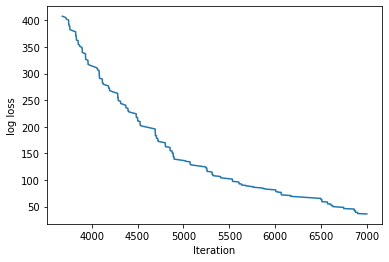

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(losslog)
plt.xlabel('Iteration')
plt.ylabel('log loss')
plt.show()

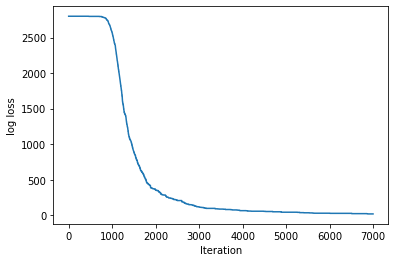

In [10]:
plt.figure()
plt.plot(losshinge)
plt.xlabel('Iteration')
plt.ylabel('log loss')
plt.show()